#### Exercise 1. GPA_SAT

In [13]:
'''
problem: find the relavance between GPA grade of students 
        and respective SAT grade of them back from high school
data: 84 observations, 2 attributes

input: SAT
output: GPA
solution: simple linear regression
'''

'\nproblem: find the relavance between GPA grade of students \n        and respective SAT grade of them back from high school\ndata: 84 observations, 2 attributes\n\ninput: SAT\noutput: GPA\nsolution: simple linear regression\n'

read data from file using pandas

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# read data
filename = 'SAT_GPA.csv'
data = pd.read_csv(filename)

# show data description
data.describe()

,SAT,GPA
count,84.000000,84.000000
mean,1845.273810,3.330238
std,104.530661,0.271617
min,1634.000000,2.400000
25%,1772.000000,3.190000
50%,1846.000000,3.380000
75%,1934.000000,3.502500
max,2050.000000,3.810000


In [16]:
data.shape

(84, 2)

split training set and validation set

In [17]:
# set training data using 60 samples
train = data.sample(60, random_state=17)
test = data[~data.index.isin(train.index)]

train_x = np.asarray([train['SAT']]).T
train_y = np.asarray([train['GPA']]).T

test_x = np.asarray([test['SAT']]).T
test_y = np.asarray([test['GPA']]).T

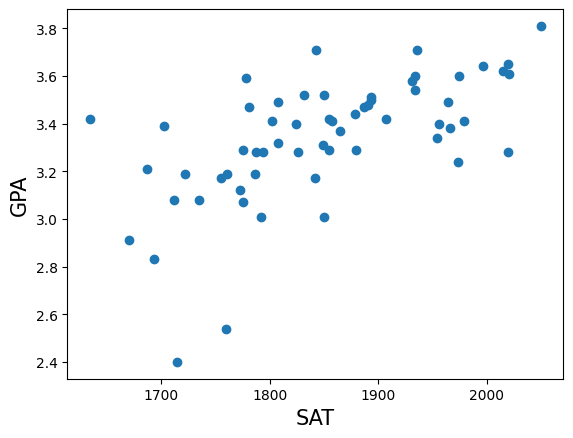

In [18]:
# visualize
plt.scatter(train_x, train_y)
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('GPA', fontsize = 15)
plt.show()

compute the linear regression function GPA ~ SAT

In [7]:
# build x_bars
one = np.ones((train_x.shape[0], 1))
x_bars = np.concatenate((one, train_x), axis = 1)

In [8]:
# calculate weights of the fitting line
A = np.dot(x_bars.T, x_bars)
b = np.dot(x_bars.T, train_y)
w = np.dot(np.linalg.pinv(A), b)
print('w = ', w)

w =  [[0.41716103]
 [0.00157935]]


In [9]:
# prepare the fitting line
w_0 = w[0][0]
w_1 = w[1][0]
x0 = np.linspace(1634, 2050, 2)
y0 = w_0 + w_1*x0

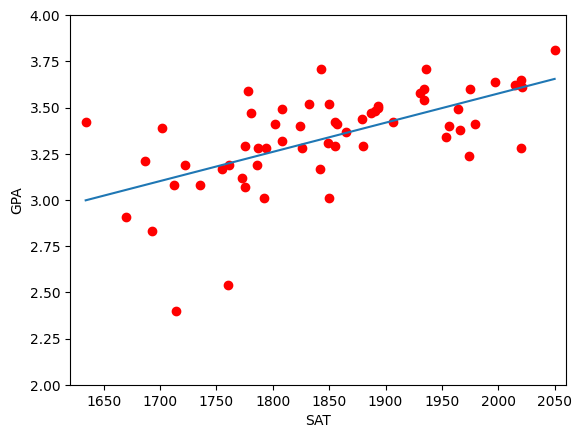

In [10]:
# draw the fitting line
plt.plot(train_x.T, train_y.T, 'ro') # data
plt.plot(x0, y0) # the fitting line
plt.axis([1620, 2060, 2, 4])
plt.xlabel('SAT')
plt.ylabel('GPA')
plt.show()

make prediction on test set

In [20]:
y_pred = w_0 + w_1*test_x
y_pred.T

array([[3.04519723, 3.07836355, 3.2031321 , 3.2031321 , 3.15733099,
        3.37370176, 3.06099072, 3.04361788, 3.29315498, 3.21102884,
        3.47162138, 3.22366363, 3.30894846, 3.33895609, 3.5600649 ,
        3.45740724, 3.14943425, 3.501629  , 3.64061168, 3.35632892,
        3.47004203, 3.27578214, 3.55532686, 3.51584314]])

In [21]:
MSE = np.square(np.subtract(y_pred, test_y)).mean()
MSE

0.047255914288628235

#### Exercise 2. NTM

read data from file

In [32]:
filename = 'vidu3_lin_reg.txt'

with open(filename, 'rt') as f:
    data = f.readlines()

x_data = []
y_data = []
data.pop(0)

for line in data:
    tokens = line.replace('\n', '').split()
    tokens.pop(0)
    tokens = list(map(float, tokens))
    x_data.append(tokens[:-1])
    y_data.append(tokens[-1])

x_data = np.asarray(x_data)
y_data = np.asarray(y_data)
x_data[:10]

array([[ 56.  ,  21.  , 160.  ,  14.  ,   6.  ],
       [ 76.  ,  18.  , 150.  ,  12.  ,   4.97],
       [ 63.  ,  16.  , 160.  ,   4.4 ,   6.39],
       [ 78.  ,  20.  , 100.  ,   4.  ,   7.  ],
       [ 87.  ,  20.  , 110.  ,   4.6 ,   4.1 ],
       [ 76.  ,  19.  , 150.  ,   4.6 ,   2.74],
       [ 55.  ,  31.  , 160.  ,   5.5 ,   4.6 ],
       [ 74.  ,  22.  , 100.  ,   6.8 ,   5.04],
       [ 81.  ,  21.  , 120.  ,   5.8 ,   4.75],
       [ 77.  ,  24.  , 160.  ,   5.4 ,   6.94]])

(a) compute actual coefficients

In [33]:
def qr_householder(A):
    """ 
    Compute QR decomposition of A using Householder reflection
    """
    M = A.shape[0]
    N = A.shape[1]

    # set Q to the identity matrix
    Q = np.identity(M)

    # set R to zero matrix
    R = np.copy(A)

    for n in range(N):
        # vector to transform
        x = A[n:, n]
        k = x.shape[0]

        # compute ro=-sign(x0)||x||
        ro = -np.sign(x[0]) * np.linalg.norm(x)

        # compute the householder vector v
        e = np.zeros(k)
        e[0] = 1
        v = (1 / (x[0] - ro)) * (x - (ro * e))

        # apply v to each column of A to find R
        for i in range(N):
            R[n:, i] = R[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ R[n:, i])

        # apply v to each column of Q
        for i in range(M):
            Q[n:, i] = Q[n:, i] - (2 / (v@v)) * ((np.outer(v, v)) @ Q[n:, i])

    return Q.transpose(), R

In [34]:
def linear_regression(x_data, y_data):
    # add column 1
    x_bars = np.concatenate((np.ones((x_data.shape[0], 1)), x_data), axis=1)

    Q, R = qr_householder(x_bars) # QR decomposition
    R_pinv = np.linalg.pinv(R) # calculate inverse matrix of R
    A = np.dot(R_pinv, Q.T) # apply formula

    return np.dot(A, y_data)

In [37]:
w = linear_regression(x_data, y_data) # get result
w = w.T.tolist()
line = ['Intercept', 'Age', "BMI", "BloodPres", 'Glucose', 'Choles']
res = list(zip(line, w))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: -0.10802908119387014
                 Age: 0.009946940947109868
                 BMI: -0.00020654770133401307
           BloodPres: 0.002181366945247518
             Glucose: 0.0076701016942299725
              Choles: 0.03847024823970336


(b) Split into training and testing. Recompute coefficients

In [44]:
# split into training and test set
msk = np.random.rand(len(data)) < 0.8
x_train = x_data[msk]
y_train = y_data[msk]

x_test = x_data[~msk]
y_test = y_data[~msk]

print(x_train.shape)
print(x_test.shape)

(82, 5)
(18, 5)


In [47]:
from sklearn.linear_model import LinearRegression

# fit model
regr = LinearRegression(fit_intercept=True)
regr.fit(x_train, y_train)

LinearRegression()

In [53]:
# print coefficients
w = np.insert(regr.coef_, 0, regr.intercept_)
line = ['Intercept', 'Age', "BMI", "BloodPres", 'Glucose', 'Choles']
res = list(zip(line, w.tolist()))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: -0.07980909728010954
                 Age: 0.009179762241215745
                 BMI: -0.0021105612223203812
           BloodPres: 0.0022714048649634094
             Glucose: 0.010795659455048297
              Choles: 0.04285071490214908


In [61]:
# make prediction on test set
x_bars = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)
w = w.reshape(1, 6)
y_pred = np.dot(w, x_bars.T)
y_pred

array([[1.21244748, 1.07889351, 1.16536013, 1.13733306, 1.24521779,
        0.96585019, 1.04208472, 1.0310208 , 1.09309122, 1.02801056,
        1.20611889, 0.72952631, 1.03833319, 0.65322894, 1.1209926 ,
        1.22377211, 0.97364107, 0.64610435]])

In [76]:
# mean
error = abs(np.subtract(y_test, y_pred))
print(error)

EX = np.mean(error)
print('EX =', EX)

DX = np.sum(np.square(error)) / (len(y_pred[0]) - 1)
print('DX =', DX)

[[0.24244748 0.02110649 0.17536013 0.13733306 0.24521779 0.23414981
  0.14791528 0.1410208  0.03690878 0.22801056 1.45388111 0.16952631
  0.16166681 0.14677106 0.0209926  0.07377211 0.37364107 0.16389565]]
EX = 0.23186760485775448
DX = 0.15773249212383503


In [62]:
# MSE
MSE = np.square(np.subtract(y_pred, y_test)).mean()
MSE

0.1489695758947331

#### Exercise 3. Estate

In [77]:
# read data
filename = 'real_estate.csv'
data = pd.read_csv(filename)

# show data description
data.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [79]:
# split into training and test set
x_train = data.iloc[:350, 1:7]
y_train = data.iloc[:350, -1]

x_test = data.iloc[350:, 1:7]
y_test = data.iloc[350:, -1]

print(x_train.shape)
print(y_train.shape)

(350, 6)
(350,)


In [87]:
# add column x0 = 1
x_bars = np.concatenate((np.ones((x_train.shape[0], 1)), x_train), axis=1)
x_test_bars = np.concatenate((np.ones((x_test.shape[0], 1)), x_test), axis=1)
x_bars.shape

(350, 7)

In [89]:
from sklearn.linear_model import LinearRegression

# fit model
regr = LinearRegression(fit_intercept=False)
regr.fit(x_bars, y_train)

LinearRegression(fit_intercept=False)

In [92]:
# print coefficients
w = regr.coef_
line = ['Intercept', 'X1', "X2", "X3", 'X4', 'X5', 'X6']
res = list(zip(line, w.tolist()))
for o in res:
    print("{: >20}: {: >10}".format(*o))

           Intercept: -16063.986195534406
                  X1: 5.408082458039003
                  X2: -0.28346078743521996
                  X3: -0.004162725549935009
                  X4: 1.134817845462235
                  X5: 256.17398160639203
                  X6: -9.683200518487398


In [95]:
# make prediction on test set
w = w.reshape(1, 7)
y_pred = np.dot(w, x_test_bars.T)
y_pred

array([[40.91832822, 33.07904463, 26.5142559 , 36.7265069 , 31.83938619,
        49.34459361, 39.84892142, 52.89285548, 47.7387286 , 29.32062722,
        45.43806556, 39.74827482, 45.02506528, 49.71033441, 42.25936827,
        30.19822648, 25.65728223, 30.62169177, 40.50132105, 27.56417544,
        43.91066001, 44.56013121, 38.95831294, 44.01571817, 48.49814109,
        30.39550758, 34.27266144, 48.86089589, 40.24691637, 51.50363666,
        47.5738015 , 55.22798861, 13.4549133 , 36.81019635, 12.83792605,
        51.39547891, 40.93904183, 31.45142233, 34.75746245, 39.93224448,
        44.65193829, 31.84683655, 37.9454322 , 42.82658705, 16.32506131,
        39.23934985, 27.64971713, 46.06475599, 34.27266144, 39.67850406,
        40.79419278, 33.38238315, 39.19582777, 44.70065917, 46.92184169,
        36.79275493, 49.75918266, 26.7299703 , 32.16109657, 14.43848652,
        49.7796826 , 46.95694728, 44.35206844, 54.02950058]])

In [109]:
# MSE
y_test = np.asarray(y_test).reshape(1, 64)
MSE = np.square(np.subtract(y_test, y_pred.T)).mean()
MSE


255.07961228973127